### Imports

In [1]:
"""
GradientBoostingClassifier Boosting Algorithm
"""
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pedro\AppData\Local\Temp\ipykernel_19116\845803570.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Train model function

In [2]:
def trainModel(X_train, y_train):
    rf = GradientBoostingClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    return rf

### Predict model function

In [3]:
def predictModel(model, X_test):
    return model.predict(X_test)

### Evalutate model function

In [4]:
def evaluateModel(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)
    return accuracy, precision, recall, f1, class_report

In [5]:
def plot_confusion_matrix_general(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

### Display metrics function

In [6]:
def displayMetrics(y_test, y_pred, accuracy, precision, recall, f1, class_report):
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("\nClassification Report:")
    print(class_report)
    print("\nConfusion Matrix: ",confusion_matrix(y_test, y_pred))
    plot_confusion_matrix_general(y_test, y_pred, ['1', '2'])

### GradientBoostingClassifier function

In [7]:
def gradientBoostingClassifier():
    apples = pd.read_csv('../datasets/apple_quality_labels.csv')

    label_encoder = LabelEncoder()
    apples['Quality'] = label_encoder.fit_transform(apples['Quality'])

    X = apples.drop(columns=['Quality'])
    y = apples['Quality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    model = trainModel(X_train, y_train)
    y_pred = predictModel(model, X_test)
    accuracy, precision, recall, f1, class_report = evaluateModel(y_test, y_pred)
    displayMetrics(y_test, y_pred, accuracy, precision, recall, f1, class_report)

### Start algorithm

Accuracy:  0.87
Precision:  0.87
Recall:  0.87
F1 Score:  0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       401
           1       0.87      0.87      0.87       399

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800


Confusion Matrix:  [[349  52]
 [ 52 347]]


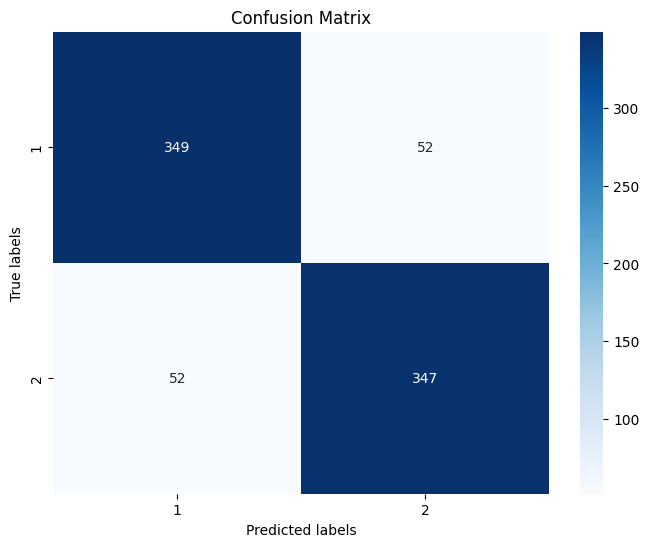

In [10]:
gradientBoostingClassifier()